In [8]:

from IPython.display import Image
#Image("images/pre-image.png")

# Addressing the pre-image problem
---

Consider a input space $\mathcal{X}$, where $\{x_1,x_2,\ldots x_n\}$ denote a set of available observations of $\mathcal{X}$ .

Let $\mathcal{H}$ be a Hilbert space of functions defined on some compact $\mathcal{X}$ ,

Consider a pattern $\psi$ in the feature space $\mathcal{H}$, obtained by a kernel-based machine. Let $\psi= \sum_{i=1}^n\alpha_i\phi(x_i)$, a linear projection.
The pre-image problem may be addressed as the following optimization problem:

$$x^* = argmin_{x\in \mathcal{X}}||\sum_{i=1}^n \alpha_i\phi(x_i)-\phi(x)||^2_\mathcal{H}$$

where we seek $x^*$ whose map $\phi(x^*)$ is as close as possible to $\psi$.

Equivalently, from the kernel trick, $x^*$ minimize the function

$$\Xi = k(x,x)-2\sum_{i=1}^n\alpha k(x,x_i)$$

![title](images/pre-image.png)(Honeine and Richard,2011)

$\textbf{Iterative scheme for Finding the Pre-Image}$ (Tin-Yau and Wai-Hung, 2004)

Recover an $x^*$ where $\varphi(x^*)\backsimeq P_\varphi (x)$ can be solved by minimmizing the squared distance between $\varphi(x^*)$ and $P_\varphi (x)$ (Mika, et.al, 1998)

$$||\varphi(x^*) - P_\varphi (x)||^2 = ||\varphi(x^*)||^2 - 2P_\varphi (x)'\varphi(x^*) + \Omega$$

where $\Omega$ term is independent of $x^*$

For instance, for a Gaussian kernel of the form $k(x,y)=exp(-||x-y||^2/c)$, this nonlinear optimization can be solved by a fixed-point iteration method. On setting the derivative to zero, the following iteration formula might be obtained:

$$ x^*_{t+1} = \frac{\sum_{i=1}^n\hat{\gamma}_i exp(-||x^*_t-x_t||^2/c)x_i}{\sum_{i=1}^n\hat{\gamma}_i exp(-||x^*_t-x_t||^2/c)}$$

(Tin-Yau and Wai-Hung, 2004) point out that iteration scheme is numerically unstable and susceptible to initial choose for $x^*_0$

$\textbf{Exact pre-images}$ (Bakir, Weston and Scholkopf, 2004)

An exact pre-image exists, if the kernel can be written as $k(x,y)=f_k((x^Ty))$ with an invertible function $f_k$, e.g. $k(x,y)=(x^Ty)^d$ with odd $d$, then the pre-image can be computed as $$x^*=\sum_{j=1}^nf_k^{-1}(\sum_{j=1}^m\alpha_j k(x_j,e_i))e_i$$, where $\{e_1\ldots e_n\}$ is any orthonormal basis of input space.

## Methods to solve the optimization problem

(Honeine and Richard,2011)

$\textbf{Gradient Descent Techniques}$

Compute the gradient the objective function $\nabla_x \Xi(x^*)$ and guess $x^*$ by stepping into the  direction opposite to the gradient, i.e.

$$x_{t+1}=x_t-\eta \nabla_x \Xi(x^*)$$

where $\eta$ is the step-size parameter.

$\textbf{Fixed-Point Iteration Method}$

Setting to zero the function to minimize, we can derivate a fixed-point iteration method. Taking for instance a Gaussian kernel, the objective function is formulated as:

$$-2\sum_{i=1}^n\alpha_i exp(-||x-x_i||^2/2\sigma^2)$$

with its gradient

$$\nabla_x \Xi(x)=-\frac{2}{\sigma^2}\sum_{i=1}^n\alpha_i exp(\frac{-||x-x_i||^2}{2\sigma^2})(x-x_i)$$

by sitting this gradient a zero

$$ x^*_{t+1} = \frac{\sum_{i=1}^n\alpha_i exp(-||x^*_t-x_i||^2/2\sigma^2)x_i}{\sum_{i=1}^n\alpha_i exp(-||x^*_t-x_i||^2/2\sigma^2)}$$

$\textbf{Learning The Preimage Map}$

A learning machine is contructed to find the preimage map, with training elements of feature space and estimated values in the input space. We seek estimate a function $\Gamma^*$ such that $\Gamma^*(\phi(x_i)) = x_i$. Then, ideally $\Gamma^*(\psi)$ should give $x*$ the preimage of $\psi$.

Two issues are consider in order to make the problem computationally tractable:

* The function is defined on a vector space. This can be done by representing vectorwise $\psi \in \mathcal{H}$ with $[\langle\psi,\psi_1 \rangle \langle\psi, \psi_2 \rangle \ldots \langle\psi,\psi_k \rangle]$, using orthogonal basis obtained from kernel PCA.
* The preimage mas is decomposed into $dim(\mathcal{X})$ functions to estimate each component of $x^*$.

Hence, we seek functions $\Gamma^*_1, \Gamma^*_2, \ldots \Gamma^*_{dim(\mathcal{X})}$ with $\Gamma^*_m:\mathbb{R}\rightarrow\mathbb{R}$. They are obtained for solving the optimization problem:

$$\Gamma^*_m = argmin_\Gamma \sum_{i=1}^nf([x_i]_m,\Gamma(\psi))+\eta g(||\Gamma||^2)$$

where $f(\cdot,\cdot)$ is a loss function and $[\cdot]_m$ denots the m-th component operator.

$\textbf{Multidimensional Scaling-Based Techniques}$

$\textbf{Conformal Map Approach}$

# Testing pre-image methods

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import scipy.io as sio #to load mat files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Synthetic data with 867 examples, 3 attributes (x, y, z), 1 label with three classes (c)

In [2]:
#sio.whosmat('../datasets/sphere_data.mat')
mat_data = sio.loadmat('../datasets/sphere_data.mat')
sphere = np.squeeze(np.asarray([mat_data['x'],mat_data['y'],mat_data['z']])).T
sphere_label = np.squeeze(np.asarray(mat_data['c']))

In [3]:
sphere.shape

(867, 3)

/opt/anaconda/envs/mindlabenv/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


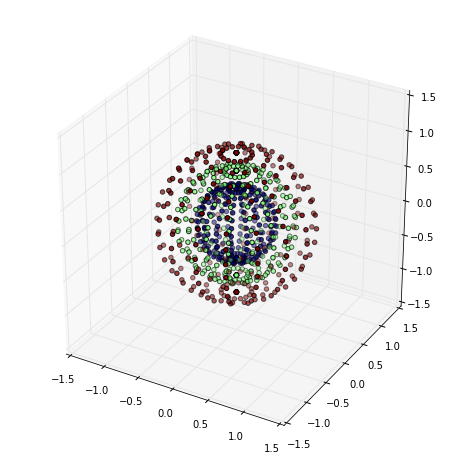

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
sc = ax.scatter(
           sphere[:,0], sphere[:,1], sphere[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )
#plt.colorbar(sc)
plt.show()                                            # render the plot

Pre-image of $\textit{Gaussian Kernel}$ applied in $\textbf{Kernel PCA}$

In [62]:
from sklearn.decomposition import PCA, KernelPCA

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(sphere)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(sphere)


<function matplotlib.pyplot.show>

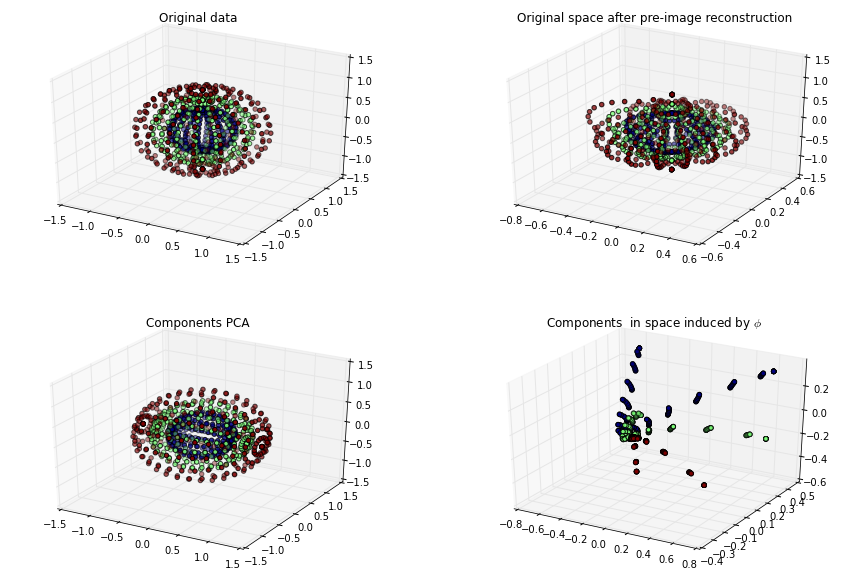

In [84]:
#plot resutlts kPCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.set_title("Original data")
sc = ax.scatter(
           sphere[:,0], sphere[:,1], sphere[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.set_title("Original space after pre-image reconstruction")
sc = ax.scatter(
           X_back[:,0], X_back[:,1], X_back[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.set_title("Components PCA")
sc = ax.scatter(
           X_pca[:,0], X_pca[:,1], X_pca[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.set_title("Components  in space induced by $\phi$")
sc = ax.scatter(
           X_kpca[:,0], X_kpca[:,1], X_kpca[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

plt.show

## Testing preimage methods

In [3]:
import kernel as kernel

According to Bakır, Schölkopf, & Weston (2007) updating rule of fixed-point method can be generalized as:

$$x^*_{t+1} = \frac{\sum_{i=1}^n\alpha k'(x_i,x_t)x_i}{\sum_{i=1}^n\alpha k'(x_i,x_t)} $$

where $k'(\cdot)$ refers to the derivate of the kernel function $k(\cdot)$

Honeine and Richard (2011) point out a similar fixed-point iterative expresion:

$$x^*_{t+1} = \frac{\sum_{i=1}^n\alpha k(x_i,x_t)x_i}{\sum_{i=1}^n\alpha k(x_i,x_t)} $$

Testing my implementation of fixed-point method to compute pre-image of $\textit{Gaussian Kernel}$ with updating rule:

$$ x^*_{t+1} = \frac{\sum_{i=1}^n\alpha_i exp(-||x^*_t-x_i||^2/2\sigma^2)x_i}{\sum_{i=1}^n\alpha_i exp(-||x^*_t-x_i||^2/2\sigma^2)}$$


In [4]:
sigma = 0.5
alpha = np.ones(sphere.shape[0])
preimxg, trainErrorsg = kernel.preimage_isot(sphere, alpha, 'rbf', gamma=(2*sigma)**-2)
preimxp, trainErrorsp = kernel.preimage_isot(sphere, alpha, 'poly', degree=2,coef0=1)
preimxl, trainErrorsl = kernel.preimage_isot(sphere, alpha, 'linear')
preimxg_, trainErrorsg_ = kernel.preimage(sphere, alpha, 'rbf', gamma=(2*sigma)**-2)
preimxp_, trainErrorsp_ = kernel.preimage(sphere, alpha, 'poly', degree=2,coef0=1)
preimxl_, trainErrorsl_ = kernel.preimage(sphere, alpha, 'linear')
preimxlxg_, trainErrorslxg_ = kernel.preimage(sphere, alpha, 'linxrbf', gamma=(2*sigma)**-2)
preimxlxg, trainErrorslxg = kernel.preimage_linxrbf(sphere, alpha, 'linxrbf', gamma=(2*sigma)**-2,coef0=1)
preimxpxg, trainErrorspxg = kernel.preimage_isot(sphere, alpha, 'polyxrbf', gamma=(2*sigma)**-2, degree=2,coef0=1)
#preimxpxg_, trainErrorspxg_ = kernel.preimage(sphere, alpha, 'polyxrbf', gamma=(2*sigma)**-2, degree=3,coef0=1)

$\textbf{Objective function}$:
$$min_{x^*\in \mathcal{X}}||\sum_{i=1}^n \alpha_i\phi(x_i)-\phi(x^*)||^2 = min_{x^*\in \mathcal{X}}\{k(x^*,x^*)-2\sum_{i=1}^n\alpha_ik(x_i,x^*)\}$$

In [5]:
#compute errors
fog = np.ones(len(trainErrorsg))

for idx,xpre in enumerate(trainErrorsg):
    #print idx, xpre
    fog[idx] = kernel._get_kernel(xpre,xpre,'rbf', gamma=(2*sigma)**-2) - 2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'rbf', gamma=(2*sigma)**-2)),alpha)

fop = np.ones(len(trainErrorsp))

for idx,xpre in enumerate(trainErrorsp):
    #print idx, xpre
    fop[idx] = kernel._get_kernel(xpre,xpre,'poly', degree=2,coef0=1) - 2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'poly', degree=2,coef0=1)),alpha)

fol = np.ones(len(trainErrorsl))

for idx,xpre in enumerate(trainErrorsl):
    #print idx, xpre
    fol[idx] = kernel._get_kernel(xpre,xpre,'linear') - 2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'linear')),alpha)
   
    
fog_ = np.ones(len(trainErrorsg_))

for idx,xpre in enumerate(trainErrorsg_):
    #print idx, xpre
    fog_[idx] = kernel._get_kernel(xpre,xpre,'rbf', gamma=(2*sigma)**-2) - 2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'rbf', gamma=(2*sigma)**-2)),alpha)

fop_ = np.ones(len(trainErrorsp_))

for idx,xpre in enumerate(trainErrorsp_):
    #print idx, xpre
    fop_[idx] = kernel._get_kernel(xpre,xpre,'poly', degree=2,coef0=1) - 2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'poly', degree=2,coef0=1)),alpha)

fol_ = np.ones(len(trainErrorsl_))

for idx,xpre in enumerate(trainErrorsl_):
    #print idx, xpre
    fol_[idx] = kernel._get_kernel(xpre,xpre,'linear') - 2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'linear')),alpha)

    
folxg_ = np.ones(len(trainErrorslxg_))

for idx,xpre in enumerate(trainErrorslxg_):
    #print idx, xpre
    folxg_[idx] = kernel._get_kernel(xpre,xpre,'linxrbf', gamma=(2*sigma)**-2) - 2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'linxrbf', gamma=(2*sigma)**-2)),alpha)

folxg = np.ones(len(trainErrorslxg))

for idx,xpre in enumerate(trainErrorslxg):
    #print idx, xpre
    folxg[idx] = kernel._get_kernel(xpre,xpre,'linxrbf', gamma=(2*sigma)**-2) - 2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'linxrbf', gamma=(2*sigma)**-2)),alpha)

    
fopxg = np.ones(len(trainErrorspxg))

for idx,xpre in enumerate(trainErrorspxg):
    #print idx, xpre
    fopxg[idx] = kernel._get_kernel(xpre,xpre,'polyxrbf', gamma=(2*sigma)**-2, degree=2,coef0=1)
    #fopxg[idx] = -2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'polyxrbf', gamma=(2*sigma)**-2, degree=2,coef0=1)),alpha)

#kernel.trainErrors[0]

In [5]:
kernel._get_kernel_deriv(sphere[0], sphere[0], 'polyxrbf', gamma=(2*sigma)**-2, degree=2,coef0=1)   

-0.203125

In [11]:
np.array([2,3,1,0]).shape
#np.dot(np.array([2,3,1,0]).T, np.array([1,0,1,0]))

(4,)

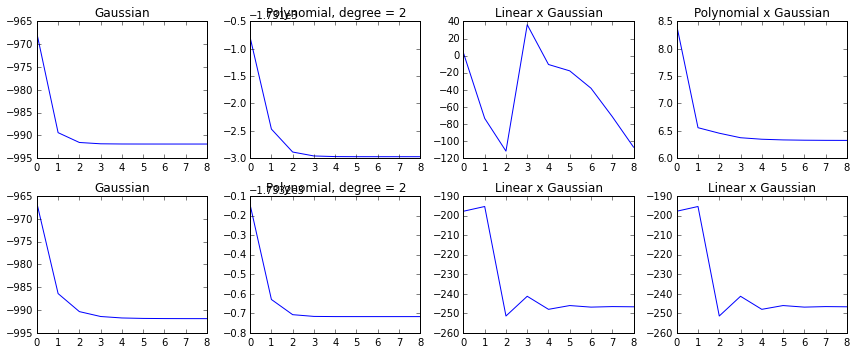

In [6]:
#plt.plot(np.arange(0,len(trainErrors)), fo)
f, axarr = plt.subplots(2, 4)
axarr[0, 0].plot(np.arange(0,len(trainErrorsg)), fog)
axarr[0, 0].set_title('Gaussian')
axarr[0, 1].plot(np.arange(0,len(trainErrorsp)), fop)
axarr[0, 1].set_title('Polynomial, degree = 2')
axarr[0, 2].plot(np.arange(0,len(trainErrorslxg)), folxg)
axarr[0, 2].set_title('Linear x Gaussian')
axarr[0, 3].plot(np.arange(0,len(trainErrorspxg)), fopxg)
axarr[0, 3].set_title('Polynomial x Gaussian')
axarr[1, 0].plot(np.arange(0,len(trainErrorsg_)), fog_)
axarr[1, 0].set_title('Gaussian')
axarr[1, 1].plot(np.arange(0,len(trainErrorsp_)), fop_)
axarr[1, 1].set_title('Polynomial, degree = 2')
axarr[1, 2].plot(np.arange(0,len(trainErrorslxg_)), folxg_)
axarr[1, 2].set_title('Linear x Gaussian')
axarr[1, 3].plot(np.arange(0,len(trainErrorslxg_)), folxg_)
axarr[1, 3].set_title('Linear x Gaussian')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
#plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
#plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
f.set_size_inches(12,5)
f.tight_layout()



Testing my implementation of fixed-point method to compute pre-image of $\textit{Polynomial Kernel}$ with updating rule generalized:

$$ x^*_{t+1} = \frac{\sum_{i=1}^n\alpha_i exp(-||x^*_t-x_i||^2/2\sigma^2)x_i}{\sum_{i=1}^n\alpha_i exp(-||x^*_t-x_i||^2/2\sigma^2)}$$

# Pre-image problem in Kernel-NMF

$\textbf{ Online Kernel Non-Negative Matrix Factorization*}$(Paez, 2011)

Online kernel-NMF $\phi(X) \approx \phi(X)WH$ 

Loss function:

$\min_{W,h_i}\frac{1}{2}||\phi(x_i)-\phi(X)Wh_i||^2+\frac{\lambda}{2}||W||_F^2+\frac{\alpha}{2}||h_i||_F^2$

Algorithm iterate assesing the following updated rules (SGD):

$h_t = (W^T_{t-1}K(X,X)W_{t-1}-\alpha I) W^T_{t-1}K(X,x_t)$

$W_t = W_{t-1}-\gamma(k(X,x_t)h_t^T-k(X,X)W_{t-1}h_th_t^T+\lambda W_{t-1})$

In [16]:
from sklearn.metrics import pairwise_kernels as K #to compute kernel matrix
import scipy.io as sio #to load mat files
from OKMF import OKMF #Online Kernel Matrix Factorization
import kernel as Kp #Compute pre-image

In [87]:
sphere.shape

(867, 3)

In [100]:
#Parameters:
Gamma = 0.01
Lambda = 0.0001
Alpha = 0.3
sigma = 2**-2
epochs = 3

In [101]:
#online kernel NMF algorithm (by Esteban)
ok = OKMF(867,3,10,epochs,Gamma,Lambda,Alpha,'rbf',gamma=sigma)
#(budgetSize,latentTopics,minibatchSize,epochs,Gamma,Lambda,Alpha,metric,**kwds):

In [102]:
ok.fit(sphere,calculateErrors=True)

Train Error:

$2\epsilon = tr(K(x_i,x_i))+tr(h^TW^TK(X,x_i))+tr(K(X,x_i)^TWh)+tr(W^TK(X,X)h^TWh)+\lambda tr(W^TW)+\alpha tr(h^Th)$

In [103]:
ok.trainErrors

array([ -1.47105233e+09,   4.42289024e+10,   4.42201837e+10,
         4.42113320e+10])

Error as $||WH-\phi(X)||_F/||\phi(X)||_F$

In [104]:
error = np.linalg.norm(np.dot(ok.W,ok.H)- ok._KB,'fro')/np.linalg.norm(ok._KB,'fro')
print error

1.000087792


In [105]:
np.dot(ok.W,ok.H).shape

(867, 867)

In [108]:
ok.H.shape

(3, 867)

$\textbf{Convex Kernel Non-negative Matrix Factorization}$

In [4]:
import pymf
from pymf.cnmf import CNMF 

In [26]:
#data = np.array([[1.0, 0.0, 2.0], [0.0, 1.0, 1.0]]) 
cnmf_mdl = CNMF(sphere, num_bases=2)
cnmf_mdl.factorize(niter=10)

In [28]:
np.dot(cnmf_mdl.W,cnmf_mdl.H).shape

(867, 3)

Exploring parameters for Convex-NMF with Gaussian kernel 

In [7]:
sigma = 0.5
KgX = kernel._get_kernel(sphere, sphere,'rbf', gamma=(2*sigma)**-2)

In [8]:
KgX.shape

(867, 867)

In [29]:
cnmf_kg = CNMF(sphere, num_bases=3)
cnmf_kg.factorize(niter=10)

In [39]:
bases = np.arange(2,sphere.shape[1]+1)
for idx,item in enumerate(bases):        
    cnmf_kg = CNMF(sphere, item)
    cnmf_kg.factorize(niter=10)
    fopxg[idx] = np.linalg.norm(sphere - np.dot(cnmf_kg.W,cnmf_kg.H))
    print "Error : ", fopxg[idx]

Error :  10.7867681855
Error :  0.029867916363


In [61]:
bases = np.arange(2,KgX.shape[1]/9)
fopxg = np.ones(len(bases))
for idx,item in enumerate(bases):        
    cnmf_kg = CNMF(KgX, item)
    cnmf_kg.factorize(niter=10)
    fopxg[idx] = np.linalg.norm(KgX - np.dot(cnmf_kg.W,cnmf_kg.H))
    #print "Error : ",idx, fopxg[idx]

In [71]:
print "min base ", bases[np.argmin(fopxg)]

min base  11


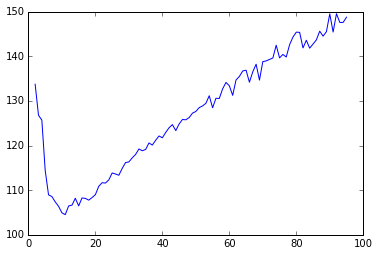

In [83]:
plt.plot(bases,fopxg)


Exploring parameters for Convex-NMF with Polynomial kernel

In [65]:
KpX = kernel._get_kernel(sphere,sphere,'poly', degree=2,coef0=1)

In [66]:
bases = np.arange(2,KpX.shape[1]/9)
fopxp = np.ones(len(bases))
for idx,item in enumerate(bases):        
    cnmf_kp = CNMF(KpX, item)
    cnmf_kp.factorize(niter=10)
    fopxp[idx] = np.linalg.norm(KpX - np.dot(cnmf_kp.W,cnmf_kp.H))

In [72]:
print "min base ", bases[np.argmin(fopxp)]

min base  4


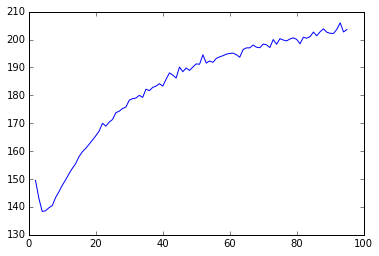

In [67]:
plt.plot(bases,fopxp)

Exploring parameters for Convex-NMF with Linear x Gaussian kernel

In [73]:
sigma = 0.5
KlxgX = kernel._get_kernel(sphere, sphere,'linxrbf', gamma=(2*sigma)**-2)

In [74]:
bases = np.arange(2,KlxgX.shape[1]/9)
fopxlxg = np.ones(len(bases))
for idx,item in enumerate(bases):        
    cnmf_klxg = CNMF(KlxgX, item)
    cnmf_klxg.factorize(niter=10)
    fopxlxg[idx] = np.linalg.norm(KlxgX - np.dot(cnmf_klxg.W,cnmf_klxg.H))

In [75]:
print "min base ", bases[np.argmin(fopxlxg)]

min base  31


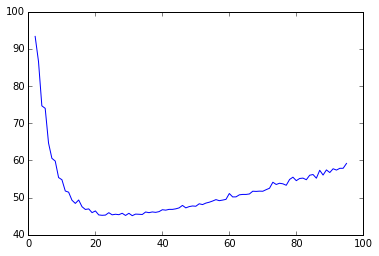

In [76]:
plt.plot(bases,fopxlxg)

Exploring parameters for Convex-NMF with Polynomial x Gaussian kernel

In [277]:
sigma = 0.5
KpxgX = kernel._get_kernel(sphere,sphere,'polyxrbf', gamma=(2*sigma)**-2, degree=2,coef0=1)

In [278]:
bases = np.arange(2,KpxgX.shape[1]/9)
fopxpxg = np.ones(len(bases))
for idx,item in enumerate(bases):        
    cnmf_kpxg = CNMF(KpxgX, item)
    cnmf_kpxg.factorize(niter=10)
    fopxpxg[idx] = np.linalg.norm(KpxgX - np.dot(cnmf_kpxg.W,cnmf_kpxg.H))

In [279]:
print "min base ", bases[np.argmin(fopxpxg)]

min base  12


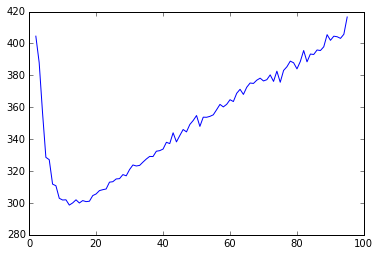

In [280]:
plt.plot(bases,fopxpxg)

$\textbf{Testing pre-image reconstruction}$

Pre-image reconstruction with whole dataset.

Gaussian kernel

In [94]:
cnmf_kg = CNMF(KgX, num_bases=11)
cnmf_kg.factorize(niter=10)
np.linalg.norm(KgX - np.dot(cnmf_kg.W,cnmf_kg.H)) # or >>> np.linalg.norm(KgX - np.dot(np.dot(KgX,cnmf_kg.G),cnmf_kg.H))

105.4028145387954

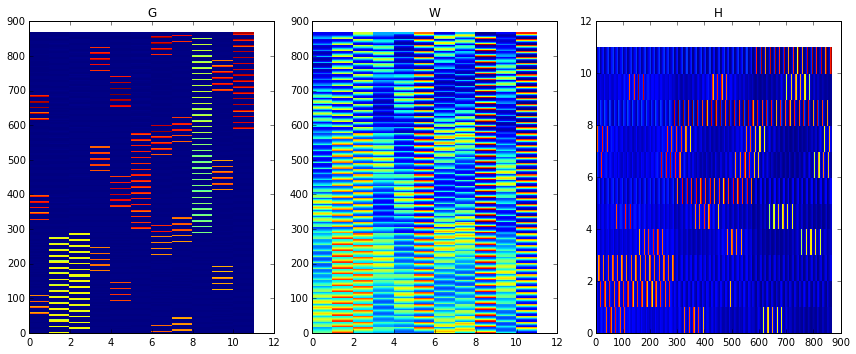

In [125]:
f, axarr = plt.subplots(1, 3)
axarr[0].pcolor(cnmf_kg.G)
axarr[0].set_title('G')
axarr[1].pcolor(cnmf_kg.W)
axarr[1].set_title('W')
axarr[2].pcolor(cnmf_kg.H)
axarr[2].set_title('H')
f.set_size_inches(12,5)
f.tight_layout()

Using $H$ matrix from Convex-NMF as $\alpha$ in pre-image reconstruction method:

In [250]:
num_bases = 11
preimxkg = np.zeros(sphere.shape)
for i in range (0,cnmf_kg.H.shape[1]):
    xs = np.vstack((sphere[i],sphere[i])).repeat([1,num_bases-1],0)
    alpha = cnmf_kg.H[:,i]#np.mean(cnmf_kg.H,0)
    preimxkg[i], trainErrorskg = kernel.preimage_isot(xs, alpha, 'rbf', gamma=(2*sigma)**-2)


In [259]:
print "Error: ",np.linalg.norm(sphere - preimxkg)

Error:  3.30432721401e-15


<function matplotlib.pyplot.show>

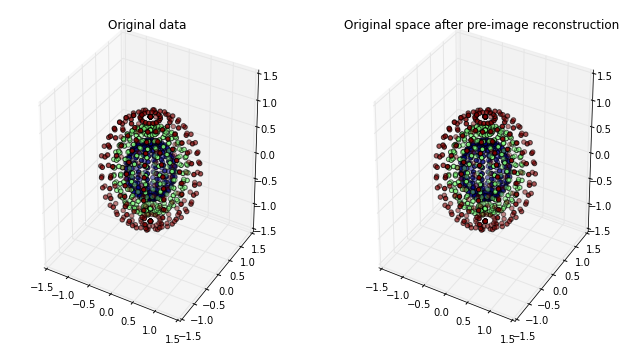

In [255]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(11,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title("Original data")
sc = ax.scatter(
           sphere[:,0], sphere[:,1], sphere[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title("Original space after pre-image reconstruction")
sc = ax.scatter(
           preimxkg[:,0], preimxkg[:,1], preimxkg[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )
plt.show

Linear x Gaussian kernel

In [263]:
cnmf_klxg = CNMF(KlxgX, num_bases=19)
cnmf_klxg.factorize(niter=10)
np.linalg.norm(KlxgX - np.dot(cnmf_klxg.W,cnmf_klxg.H)) # or >>> np.linalg.norm(KgX - np.dot(np.dot(KgX,cnmf_kg.G),cnmf_kg.H))

45.807151495066421

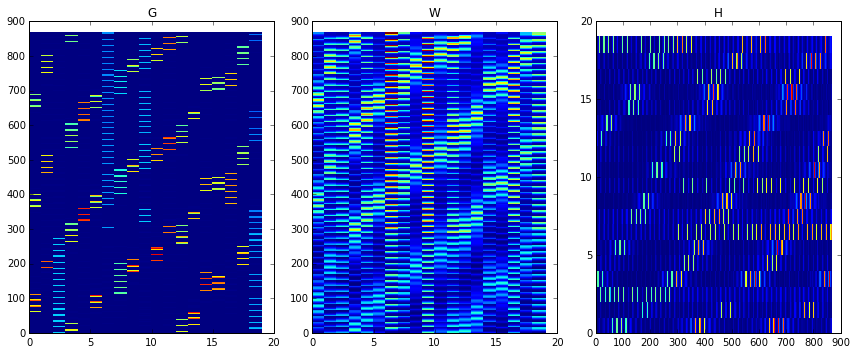

In [264]:
f, axarr = plt.subplots(1, 3)
axarr[0].pcolor(cnmf_klxg.G)
axarr[0].set_title('G')
axarr[1].pcolor(cnmf_klxg.W)
axarr[1].set_title('W')
axarr[2].pcolor(cnmf_klxg.H)
axarr[2].set_title('H')
f.set_size_inches(12,5)
f.tight_layout()

Using $H$ matrix from Convex-NMF as $\alpha$ in pre-image reconstruction method:

In [273]:
num_bases = 19
preimxklxg = np.zeros(sphere.shape)
for i in range (0,cnmf_klxg.H.shape[1]):
    xs = np.vstack((sphere[i],sphere[i])).repeat([1,num_bases-1],0)
    alpha = cnmf_klxg.H[:,i]#np.mean(cnmf_kg.H,0)
    #preimxklxg[i], trainErrorskg = kernel.preimage_linxrbf(xs, alpha, 'linxrbf', gamma=(2*sigma)**-2,coef0=1)
    preimxklxg[i], trainErrorskg = kernel.preimage(xs, alpha, 'linxrbf', gamma=(2*sigma)**-2)

In [275]:
print "Error: ",np.linalg.norm(sphere - preimxklxg)
#preimxklxg

Error:  3.98144396394e-15


<function matplotlib.pyplot.show>

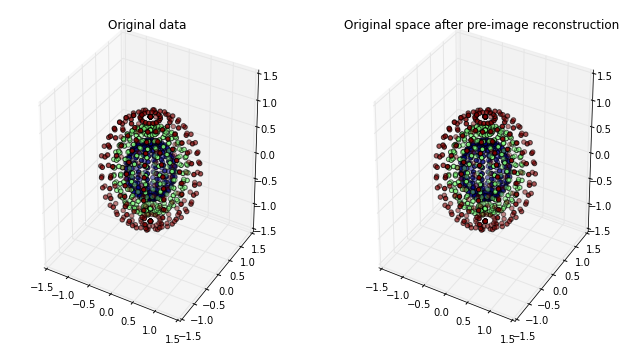

In [276]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(11,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title("Original data")
sc = ax.scatter(
           sphere[:,0], sphere[:,1], sphere[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title("Original space after pre-image reconstruction")
sc = ax.scatter(
           preimxklxg[:,0], preimxklxg[:,1], preimxklxg[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )
plt.show

Polynomial x Gaussian kernel

In [281]:
cnmf_kpxg = CNMF(KpxgX, num_bases=12)
cnmf_kpxg.factorize(niter=10)
np.linalg.norm(KpxgX - np.dot(cnmf_kpxg.W,cnmf_kpxg.H)) # or >>> np.linalg.norm(KgX - np.dot(np.dot(KgX,cnmf_kg.G),cnmf_kg.H))

302.29206098628003

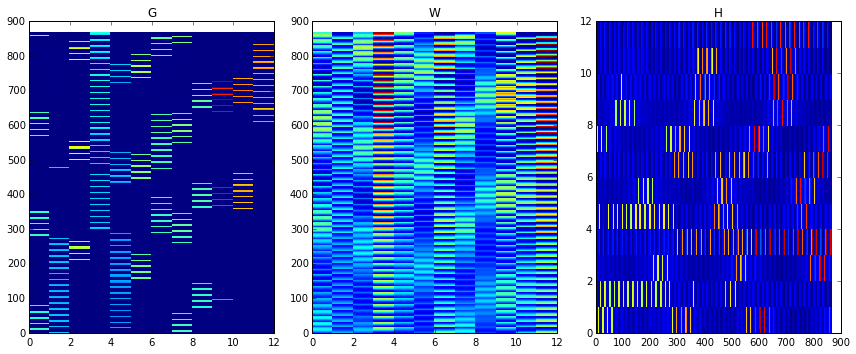

In [283]:
f, axarr = plt.subplots(1, 3)
axarr[0].pcolor(cnmf_kpxg.G)
axarr[0].set_title('G')
axarr[1].pcolor(cnmf_kpxg.W)
axarr[1].set_title('W')
axarr[2].pcolor(cnmf_kpxg.H)
axarr[2].set_title('H')
f.set_size_inches(12,5)
f.tight_layout()

Using $H$ matrix from Convex-NMF as $\alpha$ in pre-image reconstruction method:

In [294]:
num_bases = 12
preimxkpxg = np.zeros(sphere.shape)
for i in range (0,cnmf_kpxg.H.shape[1]):
    xs = np.vstack((sphere[i],sphere[i])).repeat([1,num_bases-1],0)
    alpha = cnmf_kpxg.H[:,i]#np.mean(cnmf_kg.H,0)    
    preimxkpxg[i], trainErrorskg = kernel.preimage_isot(xs, alpha, 'polyxrbf', gamma=(2*sigma)**-2, degree=2,coef0=1)
    #print preimxkpxg[i]

In [295]:
print "Error: ",np.linalg.norm(sphere - preimxkpxg)

Error:  nan


<function matplotlib.pyplot.show>

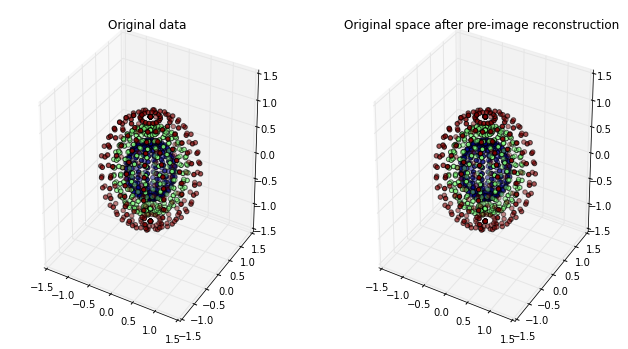

In [297]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(11,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title("Original data")
sc = ax.scatter(
           sphere[:,0], sphere[:,1], sphere[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title("Original space after pre-image reconstruction")
sc = ax.scatter(
           preimxkpxg[:,0], preimxkpxg[:,1], preimxkpxg[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )
plt.show

$\textbf{References}$

Honeine and Richard, Preimage Problem in Kernel-Based Machine Learning,  An intimate connection with the dimensionality-reduction problem, 2011

Tin-Yau and Wai-Hung, The Pre-Image Problem in Kernel Methods, 2004

In [78]:
x = np.array([[1,2]])
np.dot(x.T,x)

array([[1, 2],
       [2, 4]])

In [79]:
a = np.array([[1, 2], [3,4]])
np.linalg.eig(a)

(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))